In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
import math

# Plot graf

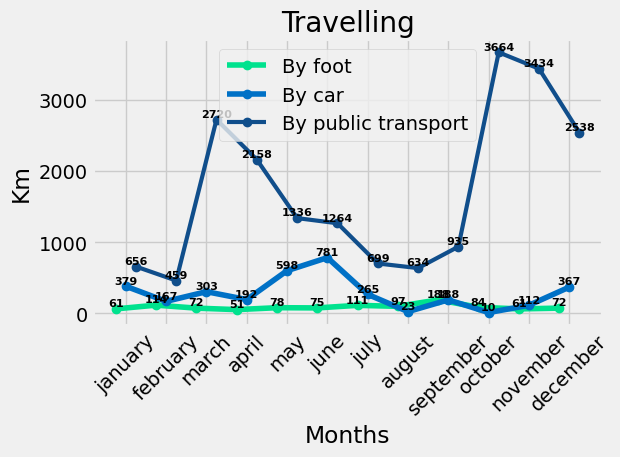

In [5]:
plt.style.use('fivethirtyeight')

data = pd.read_csv('travelling.csv', delimiter=';')

foot_data = data[data['travelling'] == 'on foot']
car_data = data[data['travelling'] == 'by car']
public_data = data[data['travelling'] == 'public transport']

months = data['month'].unique()
x_indexes = np.arange(len(months))
width = 0.25

foot = foot_data['km'].tolist()
car = car_data['km'].tolist()
public = public_data['km'].tolist()

# create Line Charts with Markers
plt.plot(x_indexes - width, foot, marker='o', linestyle='-', color='#00E28E', label='By foot')
plt.plot(x_indexes, car, marker='o', linestyle='-', color='#0071C6', label='By car')
plt.plot(x_indexes + width, public, marker='o', linestyle='-', color='#104E8B', linewidth=3, label='By public transport')

# add numeric values ​​above each point
for index, value in enumerate(foot):
    plt.text(index - width, value + 10, str(value), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

for index, value in enumerate(car):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

for index, value in enumerate(public):
    plt.text(index + width, value + 10, str(value), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

plt.legend()
plt.xticks(ticks=x_indexes, labels=months, rotation=45)
plt.title('Travelling')
plt.xlabel('Months')
plt.ylabel('Km')
plt.tight_layout()
plt.grid(True)
plt.show()

# Bar chart

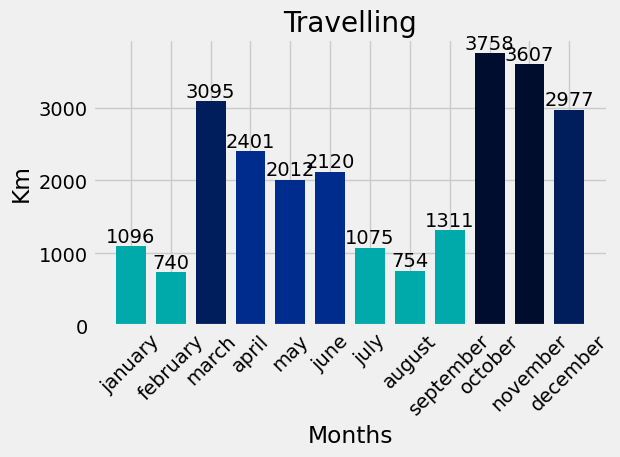

In [12]:

plt.style.use('fivethirtyeight')

data = pd.read_csv('travelling.csv', delimiter=';')

months = data['month'].unique()
x_indexes = np.arange(len(months))
y_values = data.groupby('month')['km'].sum().reindex(months).fillna(0).values
width = 0.75

# adjust the color map, starting from turquoise and ending with dark blue
cmap = colors.ListedColormap(['#00AAAA','#0044FF', '#002C8E', '#001D5C', '#000D2E'])

normalize = colors.Normalize(vmin=min(y_values), vmax=max(y_values))
colors = [cmap(normalize(value)) for value in y_values]

bars = plt.bar(x_indexes, y_values, width=width, color=colors, label='By foot')

# add numeric values ​​above each point
for i, value in enumerate(y_values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])

# input color bar
# cbar = plt.colorbar(sm, pad=0.02)
# cbar.set_label('Intensity')

plt.xticks(ticks=x_indexes, labels=months, rotation=45)
plt.title('Travelling')
plt.xlabel('Months')
plt.ylabel('Km')
plt.tight_layout()
plt.grid(True)
plt.show()

# Pie chart

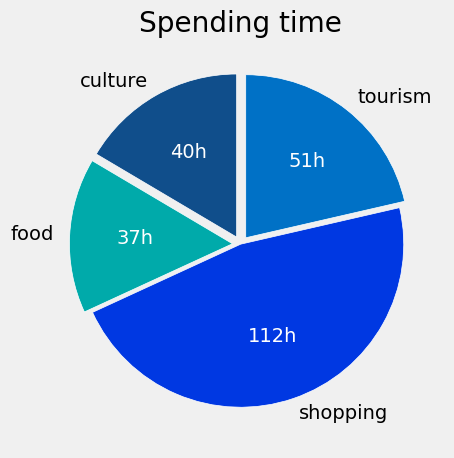

In [14]:
plt.style.use('fivethirtyeight')

data = pd.read_csv('places.csv', delimiter=';')

# creating a function to convert time to decimal hours
def time_to_decimal_hours(time_str):
    try:
        hours, minutes = map(int, time_str.strip().split(':'))
        return hours + minutes / 60
    except ValueError:
        return 0 

# create a new column 'decimal_hours' by the function
data['decimal_hours'] = data['time'].apply(time_to_decimal_hours)

grouped_data = data.groupby('visiting')['decimal_hours'].sum().reset_index()

colors = ['#104E8B', '#00AAAA', '#0038E2', '#0071C6', '#00E28E', '#00FF80']
explode = [0.05, 0.05, 0, 0.05]

slices = grouped_data['decimal_hours'].values
labels = grouped_data['visiting'].values

total_hours = math.ceil(sum(slices))

def format_hours(pct):
    remaining_hours = math.ceil(pct * total_hours / 100)
    return f"{remaining_hours}h"

# moving numbers outside sectors using pctdistance
_, _, autotexts = plt.pie(slices, colors=colors,
                           explode=explode,
                           labels=labels,
                           startangle=90,
                           autopct=format_hours,
                           pctdistance=0.60, 
                           wedgeprops={'edgecolor': 'white'})

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Spending time')
plt.tight_layout()
plt.show()

# Bar chart

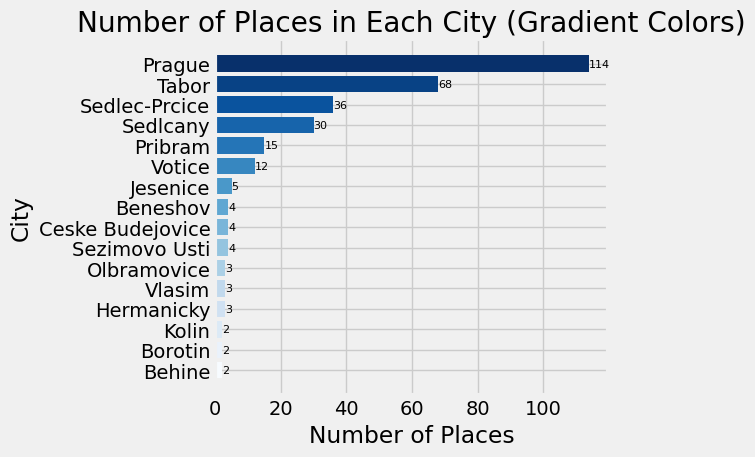

In [16]:
data = pd.read_csv('city.csv', delimiter=';')

filtered_data = data[data['places'] > 1]

sorted_data = filtered_data.sort_values(by='places', ascending=True)

colors = plt.cm.Blues(np.linspace(0, 1, len(sorted_data)))

plt.barh(sorted_data['city'], sorted_data['places'], color=colors)
plt.xlabel('Number of Places')
plt.ylabel('City')
plt.title('Number of Places in Each City (Gradient Colors)')

for index, value in enumerate(sorted_data['places']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()